# DS3000 Practicum 2: Model Development and Tuning on Diabetes Risk Factors
#### **Group members: Katherine Glenn, Cali Behling, Colin Chu**

In this practicum, you will work with a dataset that can be used to **understand the relationship between lifestyle and diabetic outcomes for patients in the USA**. The dataset that you will work with is called CDC Diabetes Health Indicators that was obtained from the Behavioral Risk Factor Surveillance System (BRFSS) which is publicly available on the CDC's website. The purpose of BRFSS is to collect data on various health-related factors. The CDC estimates that millions of Americans are either unaware that they have diabetes or are at risk i.e. they are pre-diabetic. There are many factors that influence the prevalence of diabetes, such as age, location, race, and other social determinants of health. The purpose of this practicum is to **use Data Science and Machine Learning to gain more insights.**

*Note: remember that there are several factors that determines diabetic outcomes. While this practicum gives you the opportunity to understand some of these factors, remember that there are still data points about diabetes that are not captured in this dataset. Keep in mind the scope that you are working with, state any assumptions that you make but always remember the context of this practicum.*

## Question 1: The Data Science Problem
In your own words, formulate the Data Science problem.

The goal of this assignment is to use the CDC Diabetes Health Indicators data set to gain more insight into what social, economic, and health factors influence people's risk for diagnosis of diabetes. We will conduct exploratory data analysis to visualize which variables are most correlated with a diabetes diagnosis and use these variables to create ML models that are able to predict somebody's health outcome in terms of a diabetes diagnosis based on other factors included in the dataset. The possible factors that will be used for our analysis are contained in the columns of the data set which are High Blood Pressure, High Cholesterol, Cholesterol check in the last 5 years, BMI, wether or not the person is a smoker, had a stroke, has heart disease or has had a heart attack, is physically active, eats one or more fruits or vegetables a day, is a heavy drinker, has health care, was at one point unable to afford a doctor, their general health, mental health, and physical health, if they have difficulty walking, their sex and their age, and their education and income levels. Through our data analysis we will see which of these variables is most relevant in accurately predicting the onset of diabetes and gain a better understanding into how people's lives and other social/health factors impact their health.

In [ ]:
# Import statements needed for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go
from scipy.stats import pearsonr
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

In [ ]:
# Import the data set into a pandas data frame for analysis
from google.colab import drive
drive.mount('/content/drive')
diabetes_df = pd.read_csv("drive/MyDrive/diabetes_012_health_indicators_BRFSS2015.csv")
diabetes_df.head()

Mounted at /content/drive


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Question 2: Prepare the Data (5 pts)


*   Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types for ML modeling. This means that you need to identify categorical data, discrete and continuous variables represent them accordingly.


*   Analyze the data to determine what preprocessing steps are needed to ensure that the following are handled: 1) missing values, 2) invalid values, 3) outliers. Perform the required data preparation steps and justify the approach that is taken to prepare the data for analysis.




In [ ]:
# View the data types of each variable
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

It appears that all the variables are represented as floats when they should be represented as integers. The binary variables should be integers and BMI should be an integer as well, since it is always a whole number. This conversion will need to be made.

The categorical variables in the data set are as follows: diabetes_binary, HighBP, HighCol, CholCheck, Smoker, Stroke, HeartDiseaseOrAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthCare, NoDocbcCost, DiffWalk, and Sex. All of these variables are represented through a binary data type where 0 represents one category of the variable and 1 represents another.

The discrete variables in this data set are GenHlth, MentHlth, PhysHlth, Age, Education, and Income and they are all ordinal data types where the numbers used to represent the data have a meaningful order.

The only continuous variable is BMI.

In [ ]:
# Convert all columns to the ideal data type (this should be int64) and ensure
# the change took place
for col in diabetes_df.columns:
  diabetes_df[col] = diabetes_df[col].astype(int)

diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [ ]:
# View a summary of all the columns in the data frame
diabetes_df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


All the columns seem to contain valid values that make sense in terms of the variable. It appears as though all the binary variables only have values of 0 or 1 and the ordinal variables have values within the accurate range as well as BMI. We are unable to see two of the columns due to the inability of colab to show more than 20 columns so we will inspect the value counts of those columns seperately.

In [ ]:
# Look at the values contained in the education column
diabetes_df['Education'].value_counts()

Education
6    107325
5     69910
4     62750
3      9478
2      4043
1       174
Name: count, dtype: int64

In [ ]:
# Look at the values contained in the income column
diabetes_df['Income'].value_counts()

Income
8    90385
7    43219
6    36470
5    25883
4    20135
3    15994
2    11783
1     9811
Name: count, dtype: int64

In [ ]:
# See if there any missing or null values in the dataset
diabetes_df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

It appears there are no missing or invalid values within this dataset.

Text(0.5, 1.0, 'Box Plot of BMI Values Within Dataset')

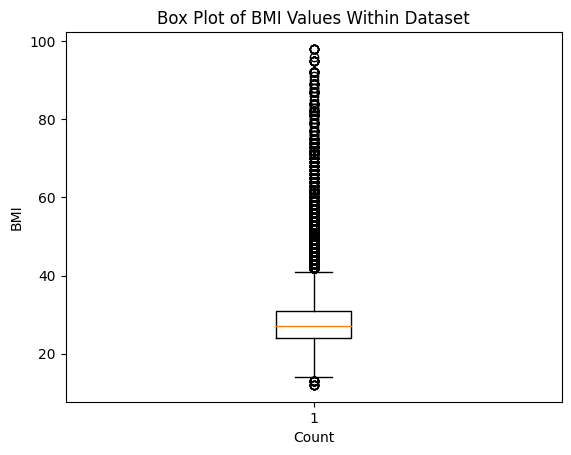

In [ ]:
# Look at the BMI column distribution to assess if there are any outliers
# We suspect there likely is since the max is 98 but the mean is around 28
plt.boxplot(diabetes_df['BMI'])
plt.xlabel("Count")
plt.ylabel("BMI")
plt.title("Box Plot of BMI Values Within Dataset")

The BMI column does appear to have many outliers. However, we will not remove these because they all fall within a range of values that is possible to be achieved for BMI and these extremes can provide valuable insights into the health of people who are severely underweight or overweight.

In [ ]:
# View if there are any duplicate rows
diabetes_df.duplicated().sum()

23899

In [ ]:
# Drop all duplicate rows in the data frame
diabetes_df.drop_duplicates(inplace = True)
diabetes_df.duplicated().sum()

0

We drop any duplicate rows to avoid biased training data that may affect our results.

## Question 3: EDA (35 pts)
Perform exploratory data analysis. Ensure that you analyze the relationships between the various features and social determinants of health in the dataset, and the diabetic outcomes. Create visualizations to demonstrate your findings and explain the results.

Text(0.5, 1.0, 'Variable Distributions')

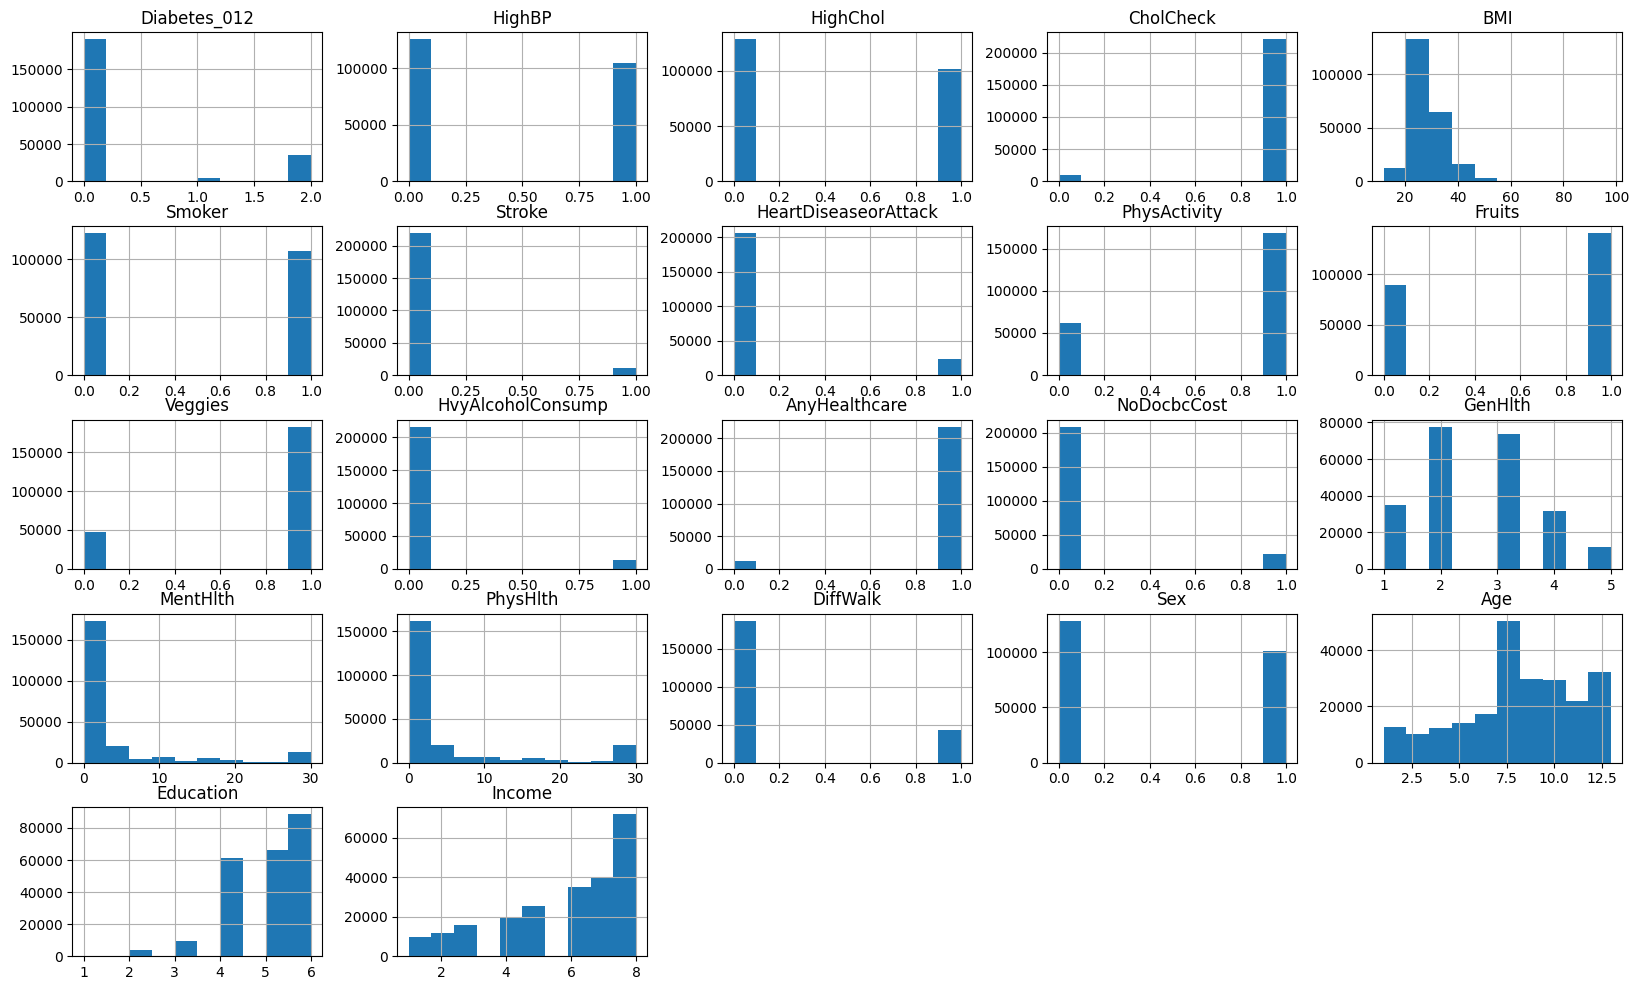

In [ ]:
# Create histograms for each column to visualize distributions
diabetes_df.hist(figsize = (20,12))
plt.title('Variable Distributions')

The above histograms visualize the distribution of each of the variables in the data set for us. We can see that this data set generally is very heavily biased towards data points of people who do not have diabetes. The other variables that have highly 'biased' data are Stroke, HeartDiseaseorAttack, PhysActivity, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, MentHlth, PhysHlth, DiffWalk, Education, and Income. BMI has a more normal distribution but is heavily impacted by extreme outliers. The data set contains more female data points than male and has more data points of people of an older aga (level 6 to 12 which represents 45-80+ years old). The data set also has more data points for people of higher income and education levels, which are factors that are often associated with health outcomes and could also bias our models as well. Most of the data is from people who have health care, another factor that is incredibly important to health outcomes and may bias our models since people with more economic privilege which is typically associated with better health outcomes.

In [ ]:
no_diabetes = len(diabetes_df[diabetes_df.Diabetes_012 == 0])
pre_diabetic = len(diabetes_df[diabetes_df.Diabetes_012 == 1])
diabetic = len(diabetes_df[diabetes_df.Diabetes_012 == 2])

print(f"Number of persons without diabetes: {no_diabetes}")
print(f"Number of pre-diabetic persons: {pre_diabetic}")
print(f"Number of persons with diabetes: {diabetic}")

Number of persons without diabetes: 190055
Number of pre-diabetic persons: 4629
Number of persons with diabetes: 35097


In [ ]:
print(f"Percent of people in dataset without diabetes: {round((no_diabetes / len(diabetes_df.Diabetes_012)) * 100, 2)}")
print(f"Percent of people who are pre-diabetic: {round((pre_diabetic / len(diabetes_df.Diabetes_012)) * 100, 2)}")
print(f"Percent of people in dataset with diabetes: {round((diabetic / len(diabetes_df.Diabetes_012)) * 100, 2)}")

Percent of people in dataset without diabetes: 82.71
Percent of people who are pre-diabetic: 2.01
Percent of people in dataset with diabetes: 15.27


Above, we have conducted further calculations to get specific numbers on what the distribution of people without diabetes, pre-diabetics, and people with diabetes within the data set is. We can see that well over the majority of data points are from people without diabetes, 82% of the data, whereas only 15% of the data points are from people with diabetes. This clearly demonstrates that are data is imbalanced towards people without diabetes and this may have an affect on the accuracy of our model in predicting wether or not certain health or social factors are associated with a diabetes diagnosis.

Text(0.5, 1.0, 'Feature Correlations')

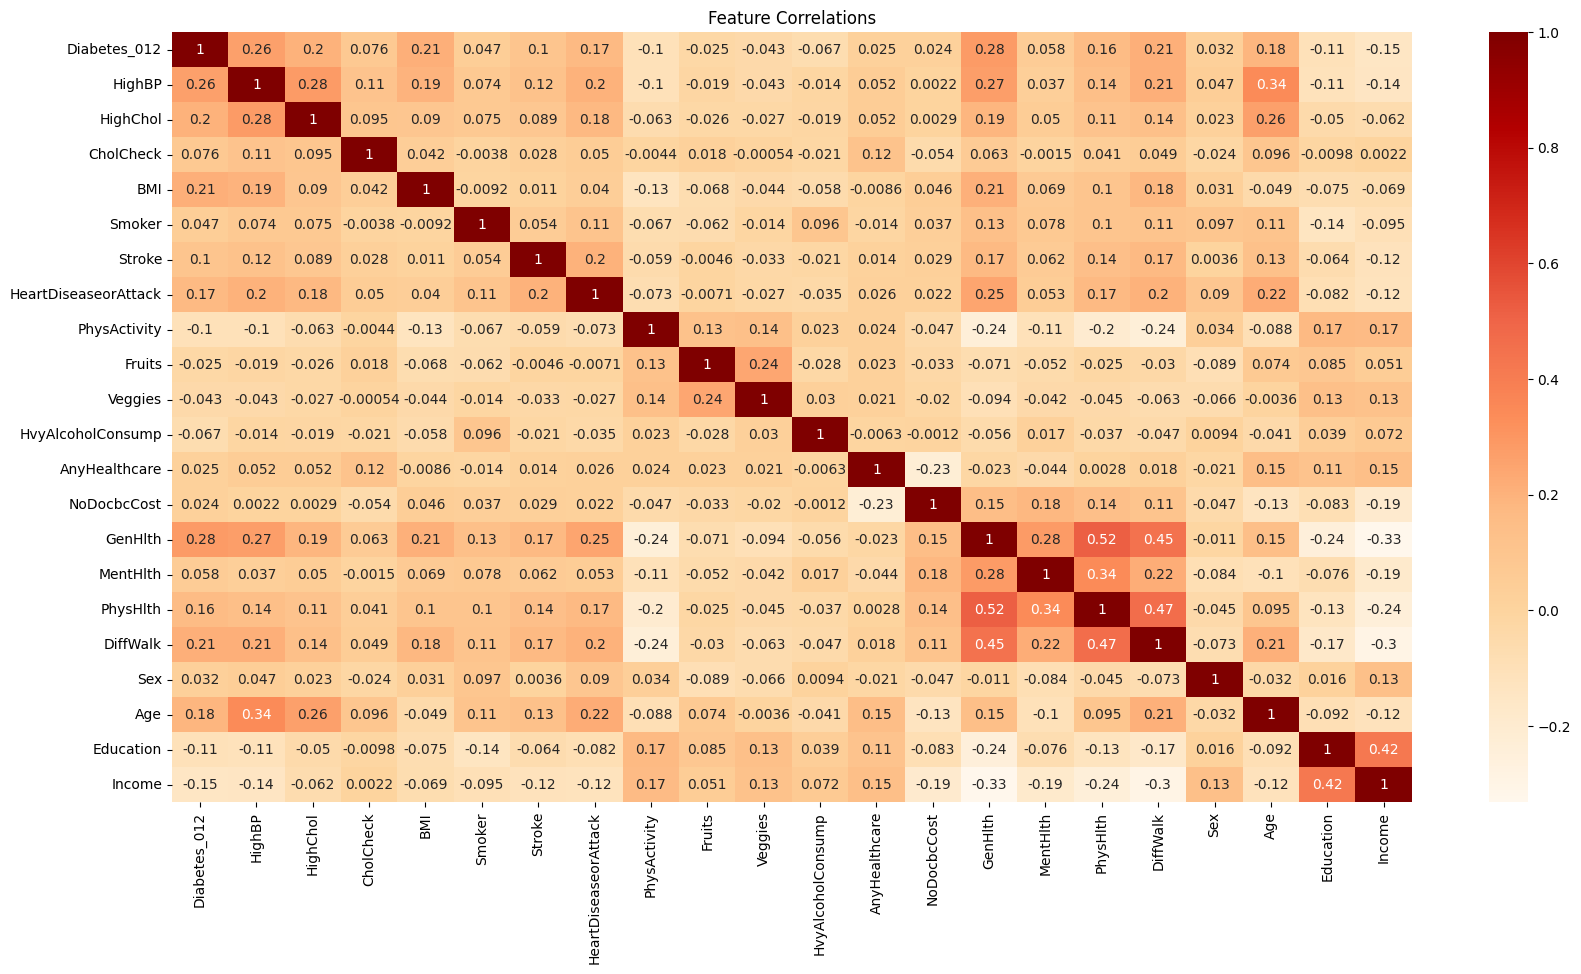

In [ ]:
# Create a heatmap to visualize correlations between all pairs of variables in
# the data frame
plt.figure(figsize = (20,10))
sns.heatmap(diabetes_df.corr(),annot=True , cmap ='OrRd' )
plt.title("Feature Correlations")

The variables that have the most significant correlations are: General Health and Physical Health, General Health and Difficuly Walking, Difficulty Walking and Physical Health, Mental Health and Physical Health, and Age and High Blood Pressure. All these pairs have positive correlations with scores of over 0.3. The most highly correlated variables are Physical Health and General Health with a score of 0.52. This makes sense in the context of the problem as all these variables are associated with general health factors that are determined by a person's perspective on their own health.

<Axes: title={'center': 'Correlation with Target (Diabetes_012)'}, ylabel='Correlation Value'>

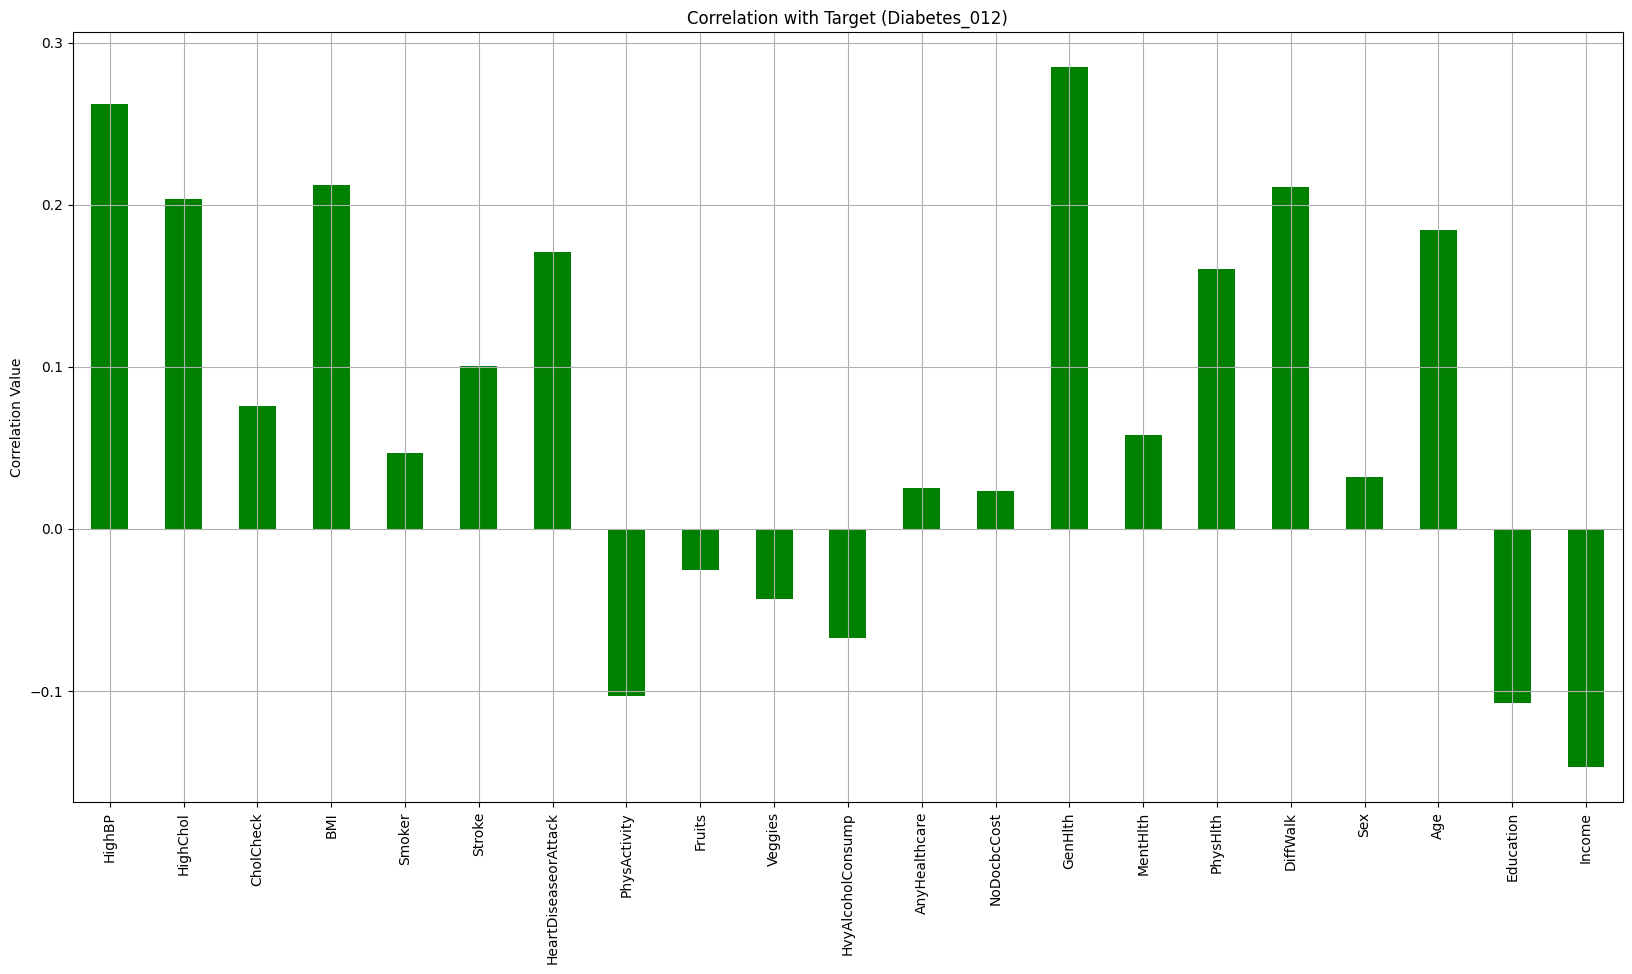

In [ ]:
# Create a bar graph that visualizes how much each feature is correlated with
# our target variable, Diabetes_012
diabetes_df.drop('Diabetes_012', axis=1).corrwith(diabetes_df.Diabetes_012).plot(kind='bar',
            grid=True, figsize=(20, 10), title="Correlation with Target (Diabetes_012)",
                      color="green", ylabel = 'Correlation Value')

The graph above isolates each feature variables correlation with the target variable, Diabetes_012. We can see that the variables least correlated with the target variable are "Fruits", "AnyHealthcare", and "NoDocbcCost". The remaining variables have more significant correlations. The variables that have the most correlation with Diabetes_102 are Difficulty Walking, General Health, BMI, High Blood Pressure, and High Cholesterol. These variables all have positive correlations with Diabetes_012. The only variables that have negative correlations are Physical Activity, Gruits, Veggies, Heavy Alcohol Consumption, Education and Income. Most of these make sense in the context of the problem as healthier lifestyle (increased physical activity and eating fruits and veggies) would be associated with better health outcomes, and higher education and income are usually associated with people of higher socio-economic status who also tend to have better health outcomes. The only one that is surprising is that Heavy Alcohol Consumption has a slight negative correlation with the target variable, more so than Fruits and Veggies. This is interesting because alcohol consumption is typically associated with adverse health affects so it is surprising that in this case it's the opposite.

<ipython-input-17-9cd2fbe4e8c2>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No', 'Yes'])
<ipython-input-17-9cd2fbe4e8c2>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No', 'Yes'])
<ipython-input-17-9cd2fbe4e8c2>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No', 'Yes'])
<ipython-input-17-9cd2fbe4e8c2>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No', 'Yes'])
<ipython-input-17-9cd2fbe4e8c2>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No', 'Yes'])
<ipython-input-17-9cd2fbe4e8c2>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No', 'Yes'])


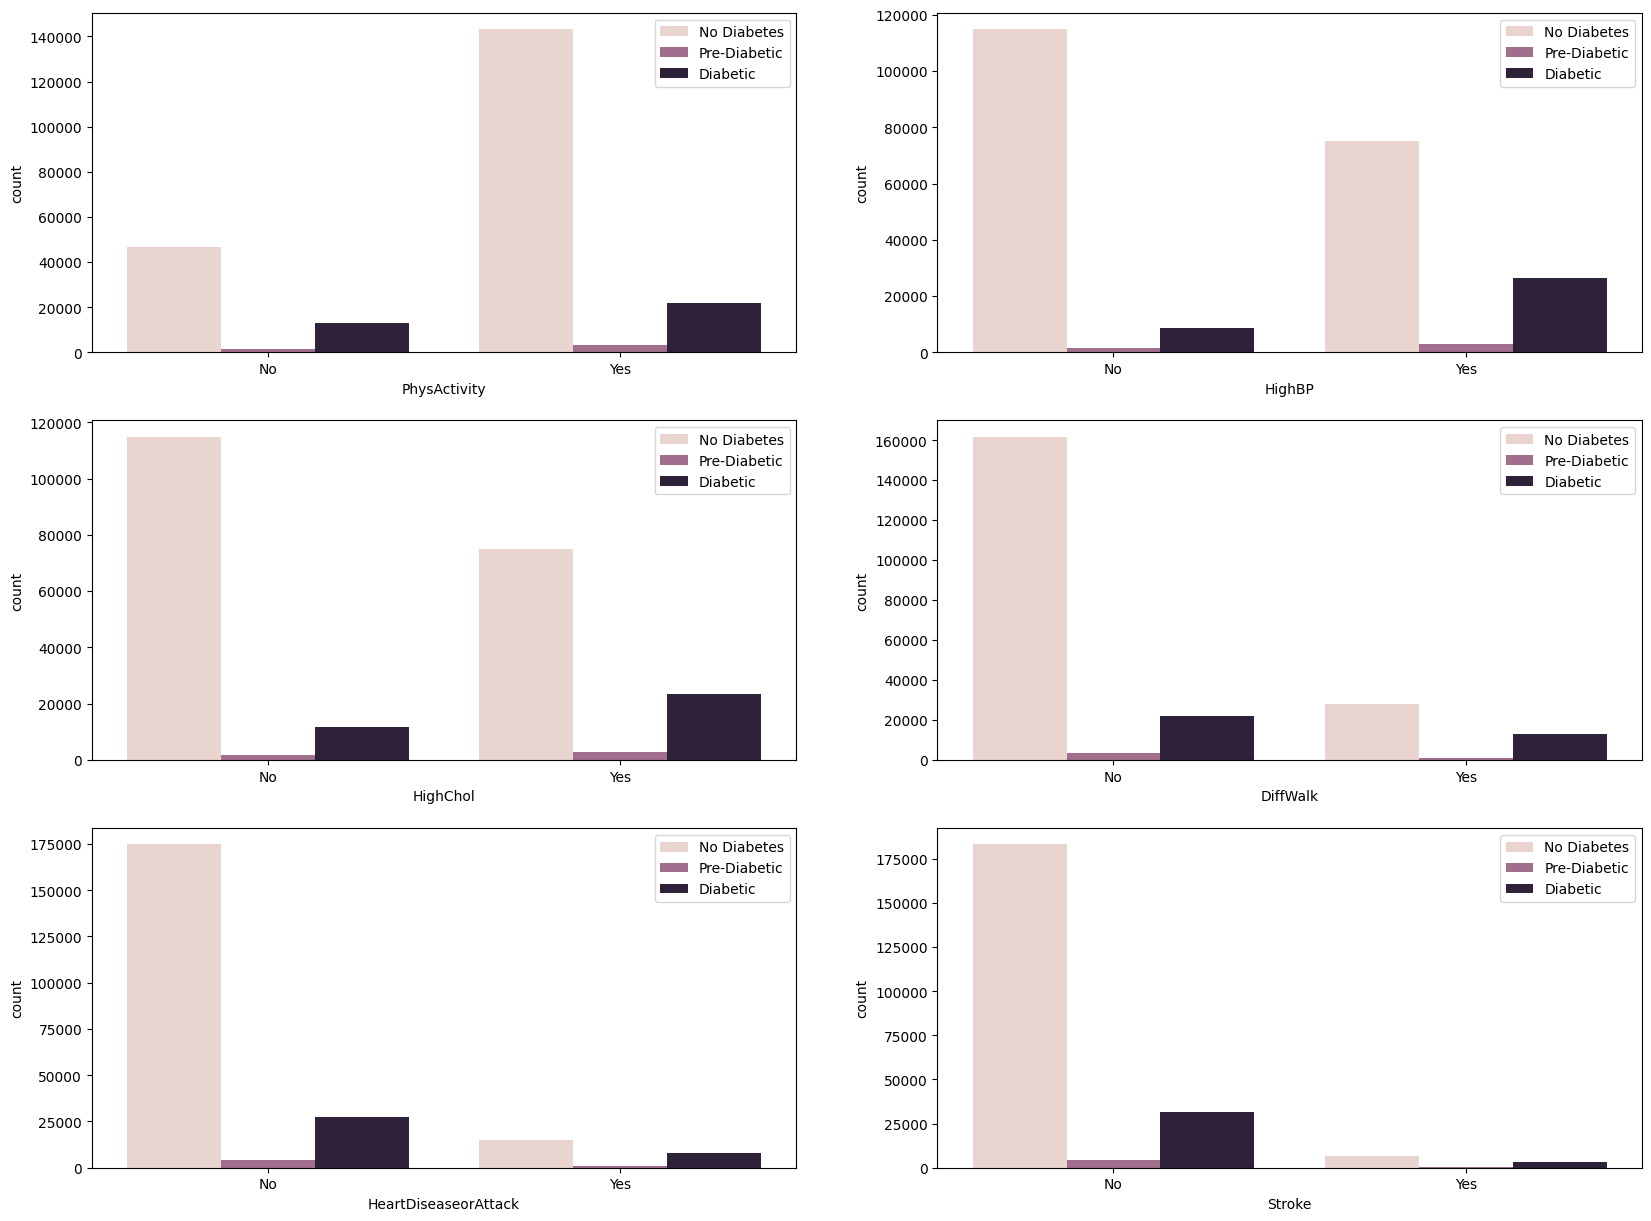

In [ ]:
# Create bar charts of the most relevant binary variables (in terms of correlation
# with the target variable) to visualize what proportion of people who answered
# yes or no to the questions have diabetes, don't have diabetes, or are
# pre-diabetic
columns = ['PhysActivity', 'HighBP', 'HighChol', 'DiffWalk', 'HeartDiseaseorAttack',
           'Stroke']
plotcount = 1

fig = plt.figure(figsize = (20,15))
for col in columns:
  plt.subplot(3, 2, plotcount)
  ax = sns.countplot(data = diabetes_df, x = col, hue = 'Diabetes_012')
  ax.set_xticklabels(['No', 'Yes'])
  ax.legend(['No Diabetes', 'Pre-Diabetic', 'Diabetic'])
  plotcount += 1

Above we created plots of what appears to be the 6 most significant binary variables in the data set and grouped them by outcome (diabetes, no diabetes, or pre-diabetic) to better visualize the relationship between these binary variables and the outcome. We can see from these charts that a higher proportion of people who have high blood pressure and high cholesterol suffer from diabetes. In addition, a higher proportion of people who have difficult walking are diagnosed with diabetes. Those who report no physical activity are also more likely to have diabetes. The last two graphs associated with heart diease or attack and strokes don't provide us with any significant conclusions as there is too late data from people who have suffered from these health issues.

## Question 4a: Significance Testing/Feature Selection (20 pts)
* Perform significance tests to determine if the patterns that are detected above are statistically significant. Ensure that you discuss at least three patterns and the respective p-values.
* Select the features that will be used in the ML models (i.e. your selected features should be based on analytical reasoning that demonstrates their utility for ML modeling. Do not arbitrarily select features.)

Note: if you are using correlations, ensure that this is only performed using continuous variables.


#### Significance Testing

#### Pattern 1: Correlations between Features and Target

In [ ]:
# filter the dataframe to disclude the target feature
features = diabetes_df.drop('Diabetes_012', axis = 1)

# set an empty array to return at the end of the loop
# the loop will fill the array with the column name, correlation coefficient,
# and p-value
ret = []

# loop through each feature and find the pearsonr correlation coefficient and
# p-value for each feature compared to the target
for feature in features.columns:
  corr, p_value = pearsonr(diabetes_df[feature], diabetes_df['Diabetes_012'])
  ret.append((feature, round(corr, 2), round(p_value, 2)))

# display the results
print(ret)

[('HighBP', 0.26, 0.0), ('HighChol', 0.2, 0.0), ('CholCheck', 0.08, 0.0), ('BMI', 0.21, 0.0), ('Smoker', 0.05, 0.0), ('Stroke', 0.1, 0.0), ('HeartDiseaseorAttack', 0.17, 0.0), ('PhysActivity', -0.1, 0.0), ('Fruits', -0.03, 0.0), ('Veggies', -0.04, 0.0), ('HvyAlcoholConsump', -0.07, 0.0), ('AnyHealthcare', 0.02, 0.0), ('NoDocbcCost', 0.02, 0.0), ('GenHlth', 0.28, 0.0), ('MentHlth', 0.06, 0.0), ('PhysHlth', 0.16, 0.0), ('DiffWalk', 0.21, 0.0), ('Sex', 0.03, 0.0), ('Age', 0.18, 0.0), ('Education', -0.11, 0.0), ('Income', -0.15, 0.0)]


As seen in the code above, all of the correlation patterns found in question 3 between the target variable and the column variables are statistically significant with p-values of 0.0. All of the correlation coefficients have a p-value of 0.0 when rounded to 2 decimal places, showing that they are all statistically significant and are not due to chance. Based on these results, all of the variables could be potential features in the model and none are ruled out because of their lack of statistical significance.

#### Pattern 2: Positive Correlations between Features

In [ ]:
# find the correlation coefficient and p-value between GenHlth and PhysHlth
corr2, p_value2 = pearsonr(diabetes_df['GenHlth'], diabetes_df['PhysHlth'])

# print results
print('The p-value between GenHlth and PhysHlth is:', round(p_value2, 2))
print('The correlation coefficient between GenHlth and PhysHlth:',
      round(corr2,2))

The p-value between GenHlth and PhysHlth is: 0.0
The correlation coefficient between GenHlth and PhysHlth: 0.52


In [ ]:
# find the correlation coefficient and p-value between GenHlth and PhysHlth
corr3, p_value3 = pearsonr(diabetes_df['DiffWalk'], diabetes_df['PhysHlth'])

# print results
print('The p-value between DiffWalk and PhysHlth is:', round(p_value3, 2))
print('The correlation coefficient between DiffWalk and PhysHlth:',
      round(corr3,2))

The p-value between DiffWalk and PhysHlth is: 0.0
The correlation coefficient between DiffWalk and PhysHlth: 0.47


In [ ]:
# find the correlation coefficient and p-value between GenHlth and PhysHlth
corr4, p_value4 = pearsonr(diabetes_df['DiffWalk'], diabetes_df['GenHlth'])

# print results
print('The p-value between DiffWalk and GenHlth is:', round(p_value4, 2))
print('The correlation coefficient between DiffWalk and GenHlth:',
      round(corr4,2))

The p-value between DiffWalk and GenHlth is: 0.0
The correlation coefficient between DiffWalk and GenHlth: 0.45


Aside from the correlations with the target variable, there were some other correlations between features displayed in question 3. Some of the strongest positive correlations were between Physical Health and General Health, 0.52 correlation coefficient, Physical Health and Difficulty Walking 0.47 correlation coefficient, and Difficulty Walking and General Health, 0.42 correlation coefficient. As seen in the code above, all of the p-values when rounded to 2 decimal places are 0.0. This means that all of these positive correlations are statistically significant and not due to chance. These correlations mean that when patients have more days in the past 30 days where they feel not good, they also have poor general health. The second correlation shows that when patients serious difficulty walking, they have more days where they feel not good. And lastly, when patients have more difficulty walking, they rate their general health poorer.

#### Pattern 3: Negative Correlations between Features

In [ ]:
# find the correlation coefficient and p-value between Income and GenHlth
corr5, p_value5 = pearsonr(diabetes_df['Income'], diabetes_df['GenHlth'])

# print results
print('The p-value between Income and GenHlth is:', round(p_value5, 2))
print('The correlation coefficient between Income and GenHlth:',
      round(corr5,2))

The p-value between Income and GenHlth is: 0.0
The correlation coefficient between Income and GenHlth: -0.33


In [ ]:
# find the correlation coefficient and p-value between Education and GenHlth
corr6, p_value6 = pearsonr(diabetes_df['Education'], diabetes_df['GenHlth'])

# print results
print('The p-value between Education and GenHlth is:', round(p_value6, 2))
print('The correlation coefficient between Education and GenHlth:',
      round(corr6,2))

The p-value between Education and GenHlth is: 0.0
The correlation coefficient between Education and GenHlth: -0.24


In [ ]:
# find the correlation coefficient and p-value between Income and DiffWalk
corr7, p_value7 = pearsonr(diabetes_df['Income'], diabetes_df['DiffWalk'])

# print results
print('The p-value between Income and DiffWalk is:', round(p_value7, 2))
print('The correlation coefficient between Income and DiffWalk:',
      round(corr7,2))

The p-value between Income and DiffWalk is: 0.0
The correlation coefficient between Income and DiffWalk: -0.3


Aside from the correlations with the target variable, and positive correlations among other features, there also were negative correlations between features displayed in question 3. Some of the strongest negative correlations were between Income and General Health, -0.33 correlation coefficient, Education and General Health -0.24 correlation coefficient, and Income and Difficulty Walking, -0.3 correlation coefficient. As seen in the code above, all of the p-values when rounded to 2 decimal places are 0.0. This means that all of these negative correlations are statistically significant and not due to chance. These correlations mean that when patients have less income they have less difficulty walking and poorer better general health. The second correlation shows that with less education, patients generally experience poorer health.

### Feature Selection
Although the patterns observed above were based on correlations, the only continuous variable is BMI, so only this correlation can justify a feature selection. The correlation between BMI and the target is 0.21 which is one of the highest correlations between any of the features and the target. For this reason, BMI will be included as a feature for the machine learning model. The rest of the features will be analyzed based on variance and univariate feature selection.

#### Variance

In [ ]:
# feature selection by variance for binary variables
# filter dataframe to disclude target variable and discrete variables
filtered_df = diabetes_df.drop(columns = ['Diabetes_012', 'PhysHlth',
                                          'MentHlth', 'GenHlth', 'Income',
                                          'Education', 'Age', 'BMI'], axis = 1)

# applying variance threshold of 80%
# the variance of binary variables is decided by the equation Var[X] = p(1-p)
sel = VarianceThreshold(threshold = .8 * (1 - .8))
sel.fit_transform(filtered_df)

# displaying the features that were kept and dropped based on
# variance threshold
features_kept = sel.get_support()
dropped_features = filtered_df.columns[~features_kept]
kept_features = filtered_df.columns[features_kept]
print('Features with less than 80% variance:', dropped_features)
print('Features with more than 80% variance:', kept_features)

Features with less than 80% variance: Index(['CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'DiffWalk'],
      dtype='object')
Features with more than 80% variance: Index(['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies',
       'Sex'],
      dtype='object')


<ipython-input-26-79112858ec50>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = filtered_df, x = col, palette = 'pastel')
<ipython-input-26-79112858ec50>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '1'])
<ipython-input-26-79112858ec50>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = filtered_df, x = col, palette = 'pastel')
<ipython-input-26-79112858ec50>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '1'])
<ipython-input-26-79112858ec50>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0

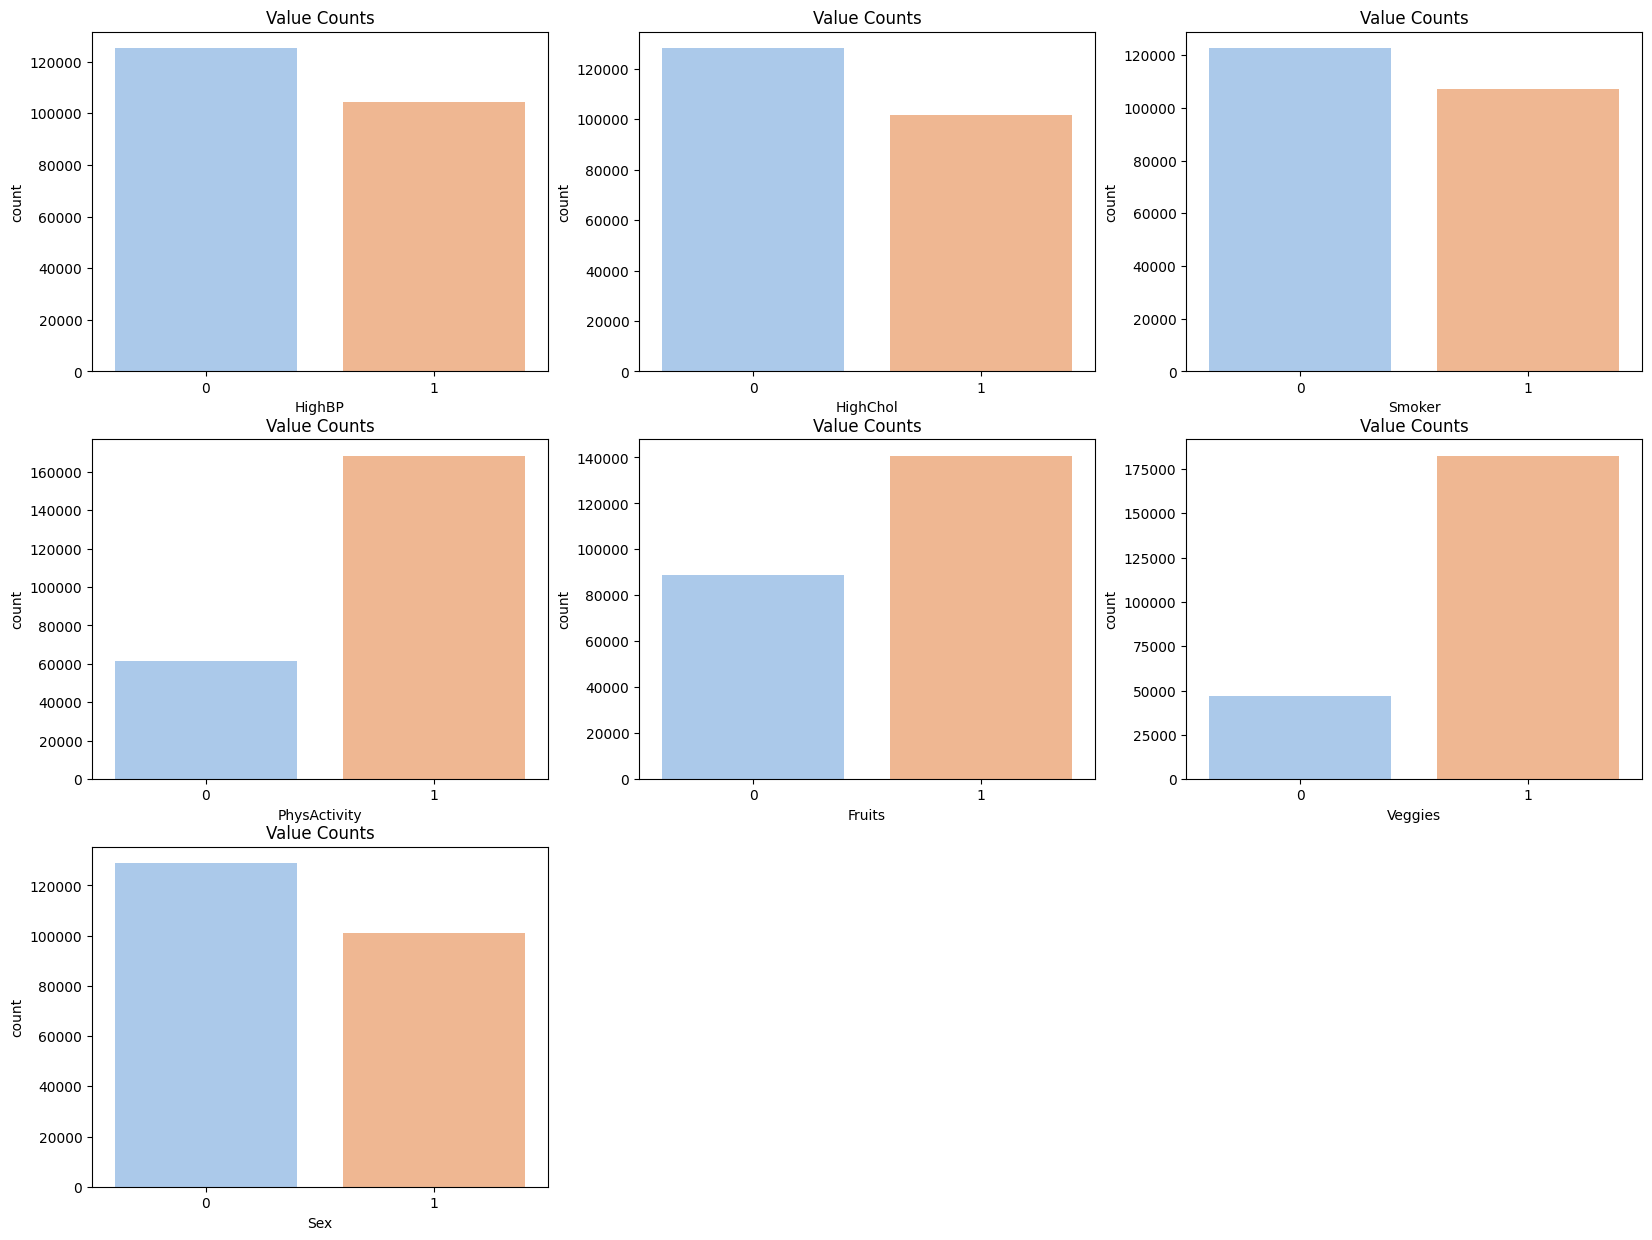

In [ ]:
# display the variance of kept variables (variables with high variance)
plotcount = 1

fig = plt.figure(figsize = (20, 15))
for col in kept_features:
  plt.subplot(3, 3, plotcount)
  ax = sns.countplot(data = filtered_df, x = col, palette = 'pastel')
  ax.set_xticklabels(['0', '1'])
  ax.set_title('Value Counts')
  plotcount += 1

<ipython-input-27-5408a97590de>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = filtered_df, x = col, palette = 'pastel')
<ipython-input-27-5408a97590de>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '1'])
<ipython-input-27-5408a97590de>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = filtered_df, x = col, palette = 'pastel')
<ipython-input-27-5408a97590de>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '1'])
<ipython-input-27-5408a97590de>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0

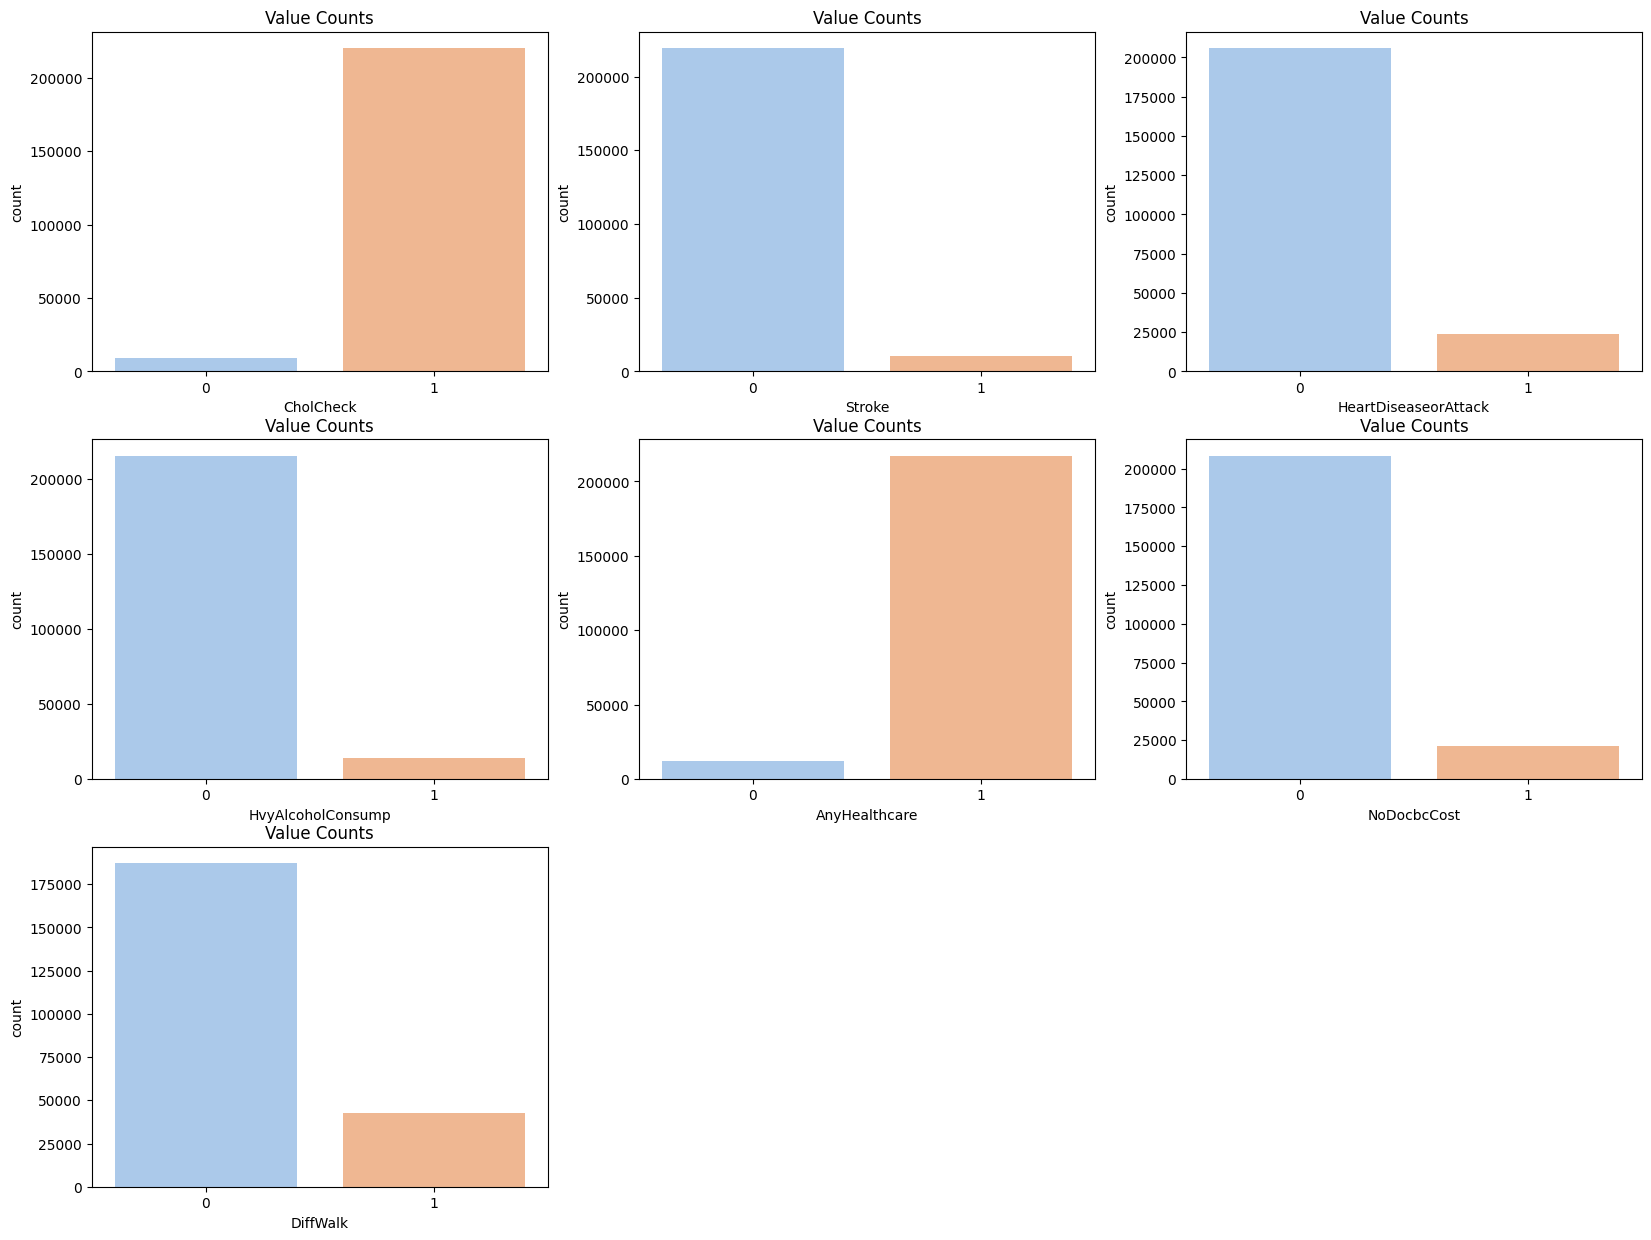

In [ ]:
# display the variance of dropped variables (variables with low variance)
plotcount = 1

fig = plt.figure(figsize = (20, 15))
for col in dropped_features:
  plt.subplot(3, 3, plotcount)
  ax = sns.countplot(data = filtered_df, x = col, palette = 'pastel')
  ax.set_xticklabels(['0', '1'])
  ax.set_title('Value Counts')
  plotcount += 1

For the binary data types (HighBP, HighCol, CholCheck, Smoker, Stroke, HeartDiseaseOrAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthCare, NoDocbcCost, DiffWalk, and Sex), I performed feature selection based on variance. The chosen threshold is 80%, meaning that all features that are either one or zero in more than 80% of the samples will not be good features for the model. This is because there is a clear majority for these variables which will inaccurately train the model. For this reason, CholCheck, Stroke, HeartDiseaseorAttack, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, and DiffWalk will all be dropped and not included in the machine model. None of these have high correlations with the target, so there is no reason to include these in the model. As seen by the graphs, the high variant variables bars are closer in height representing more even distribution between 0 and 1 whereas the low variant variables are not close in height showing the clear majority of either 0 or 1.

Out of the variables that have greater than 80% variance, we also analyzed pairwise correlations between fruits and veggies and physical health and mental health. Fruits and veggies have a correlation coefficient of 0.24 which shows that their values are relatively close, but too weak to justify dropping either of the features from the model. Mental health has a correlation coefficient of 0.34 with physical health. Again, although this is a stronger correlation than between fruits and veggies, both are among the most correlated with the target variable, so they are important to keep in the model.

#### Chi-Squared

Original feature number: 6
Reduced feature number: 4
Selected features:
GenHlth
MentHlth
PhysHlth
Age


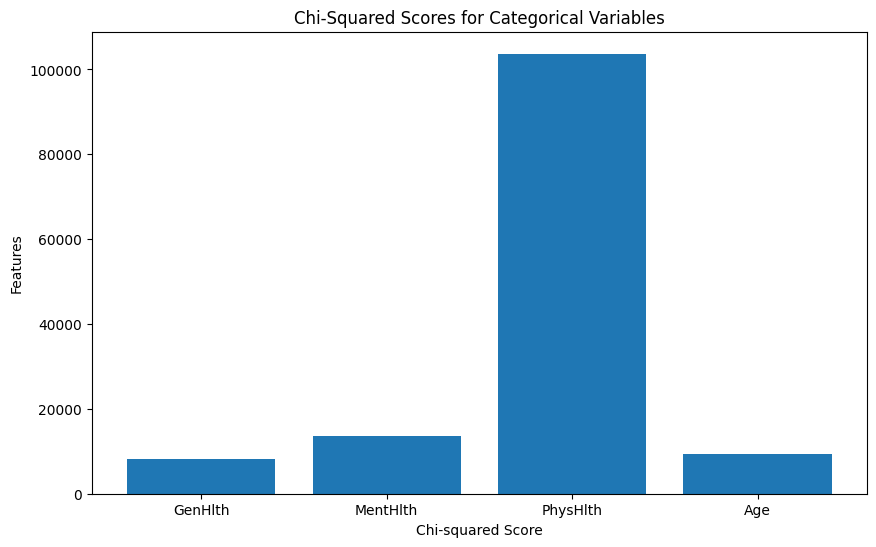

In [ ]:
# filter data frame to include only discrete variables
filtered_df2 = diabetes_df.drop(columns = ['HighBP', 'HighChol', 'CholCheck',
                                           'Smoker', 'Stroke',
                                           'HeartDiseaseorAttack',
                                           'PhysActivity', 'Fruits', 'Veggies',
                                           'HvyAlcoholConsump', 'AnyHealthcare',
                                           'NoDocbcCost', 'DiffWalk', 'Sex',
                                           'Diabetes_012', 'BMI'],
                                axis = 1)

# 3 features with highest chi-squared statistics
chi2_features = SelectKBest(chi2, k = 4)
df_kbest_feats = chi2_features.fit_transform(filtered_df2,
                                             diabetes_df['Diabetes_012'])
selected_feature_indices = chi2_features.get_support(indices=True)
selected_feature_names = filtered_df2.columns[selected_feature_indices]
chi2_scores = chi2_features.scores_

# print reduced features
print('Original feature number:', filtered_df2.shape[1])
print('Reduced feature number:', df_kbest_feats.shape[1])
print('Selected features:')
for name in selected_feature_names:
    print(name)

#display chi-squared scores
plt.figure(figsize = (10, 6))
plt.bar(selected_feature_names, chi2_scores[selected_feature_indices])
plt.xlabel('Chi-squared Score')
plt.ylabel('Features')
plt.title('Chi-Squared Scores for Categorical Variables')
plt.show()

For the categorical features in the dataset, the chi-squared test is most applicable. The 4 features with the highest chi-squared statistics were MentHlth, PhysHlth, GenHlth, and Age. This means that these 4 are most dependent with the target and these variables have the most predictive power out of the categorical features.

#### Final Feature Selection:
- GenHlth
- MentHlth
- PhysHlth
- Age
- BMI
- HighBP
- HighChol
- Smoker
- PhysActivity
- Fruits
- Veggies
- Sex

## Question 4b: Feature Engineering/Statistical Tests (10 pts)
This is an optional challenge question. Its purpose is to identify new features that can be included in the ML modeling below.

Perform ONE of the following
1. **Feature engineering:** Machine learning models can benefit greatly from feature engineering. Create a new feature that can be included in the model and perform significance testing to determine if it's statistically significant. Explain the results. If you decide that you will not include the new feature in the ML modeling, explain the reasons.
OR
2. **Statistical tests:** Research a new type of statistical test that was not introduced in the lecture and write python code to demonstrate at least two significance tests between features in the dataset. Explain the results. If you decide that you will not include the new feature in the ML modeling, explain the reasons. Note: you are welcome to use libraries to perform the tests.

## Question 5: Prepare Data for ML (5 pts)

Partition the data into train/test sets. After which, perform the following:
encode any categorical data. Ensure that categorical variables are represented correctly.
normalize numeric data.
Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).

In [ ]:
#partition the data
X   = diabetes_df[['GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'BMI', 'HighBP',
                   'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies',
                   'Sex']]
                   #get the input features
y   = diabetes_df['Diabetes_012'] #get the target

X_train, X_test, y_train, y_test = train_test_split(X, #the input features
                                                    y, #the label
                                                    test_size=0.3, #set aside
                                                    # 30% of the data as the
                                                    # test set
                                                    random_state=7, #reproduce
                                                    # the results
                                                    stratify=y) #preserve the
                                                    #distribution of the labels

In [ ]:
#normalize the numeric features
scaler = StandardScaler()
scaler.fit(X_train[['GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'BMI', 'HighBP',
                    'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies',
                    'Sex']])

#scale/transform the training data
X_train[['GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'BMI', 'HighBP', 'HighChol',
         'Smoker', 'PhysActivity', 'Fruits',
         'Veggies', 'Sex']] = scaler.transform(X_train[['GenHlth', 'MentHlth',
                                                        'PhysHlth', 'Age',
                                                        'BMI', 'HighBP',
                                                        'HighChol', 'Smoker',
                                                        'PhysActivity',
                                                        'Fruits', 'Veggies',
                                                        'Sex']])

# view prepared data
X_train.head(10)

,GenHlth,MentHlth,PhysHlth,Age,BMI,HighBP,HighChol,Smoker,PhysActivity,Fruits,Veggies,Sex
249103,0.373867,-0.454766,-0.185680,-0.994105,-0.251989,-0.912358,-0.887309,-0.933401,0.602905,-1.258206,0.508620,1.126577
204784,-0.563413,-0.454766,0.256654,0.622462,-0.251989,-0.912358,1.127003,1.071351,0.602905,-1.258206,-1.966105,1.126577
135767,1.311146,-0.454766,2.800073,0.945775,2.548480,1.096061,1.127003,-0.933401,0.602905,0.794782,0.508620,-0.887645
3363,-0.563413,0.191631,-0.517430,-0.994105,1.074549,1.096061,1.127003,1.071351,0.602905,-1.258206,0.508620,1.126577
103061,0.373867,-0.454766,-0.517430,-0.670792,-0.251989,-0.912358,-0.887309,1.071351,-1.658636,0.794782,-1.966105,1.126577
219938,0.373867,-0.066928,0.256654,0.299148,0.190190,-0.912358,1.127003,-0.933401,0.602905,0.794782,0.508620,-0.887645
163877,0.373867,-0.454766,-0.517430,0.299148,0.042797,-0.912358,1.127003,-0.933401,-1.658636,0.794782,0.508620,1.126577
184835,-1.500693,-0.454766,-0.517430,-0.024165,-0.104596,-0.912358,1.127003,1.071351,0.602905,-1.258206,0.508620,1.126577
164742,0.373867,-0.454766,-0.517430,0.945775,0.337583,-0.912358,-0.887309,-0.933401,0.602905,-1.258206,-1.966105,-0.887645
205106,1.311146,-0.454766,-0.075096,-0.994105,1.811515,1.096061,-0.887309,-0.933401,-1.658636,-1.258206,0.508620,1.126577


In [ ]:
#scale/transform the new/test data
X_test[['GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'BMI',
        'HighBP', 'HighChol', 'Smoker', 'PhysActivity',
        'Fruits', 'Veggies', 'Sex']] = scaler.transform(X_test[['GenHlth',
                                                                'MentHlth',
                                                                'PhysHlth',
                                                                'Age', 'BMI',
                                                                'HighBP',
                                                                'HighChol',
                                                                'Smoker',
                                                                'PhysActivity',
                                                                'Fruits',
                                                                'Veggies',
                                                                'Sex']])
# view prepared data
X_test.head(10)

,GenHlth,MentHlth,PhysHlth,Age,BMI,HighBP,HighChol,Smoker,PhysActivity,Fruits,Veggies,Sex
195621,1.311146,-0.454766,-0.296263,-0.994105,1.074549,1.096061,-0.887309,-0.933401,0.602905,-1.258206,-1.966105,-0.887645
61353,-0.563413,-0.454766,-0.517430,0.945775,0.337583,-0.912358,-0.887309,-0.933401,0.602905,-1.258206,-1.966105,1.126577
18831,-0.563413,0.062351,-0.517430,-1.964046,-0.841562,1.096061,-0.887309,1.071351,0.602905,0.794782,0.508620,1.126577
21733,0.373867,0.191631,0.035487,-0.994105,-0.251989,-0.912358,1.127003,-0.933401,0.602905,0.794782,0.508620,-0.887645
73316,-0.563413,-0.454766,-0.406846,-0.347479,1.074549,-0.912358,-0.887309,1.071351,-1.658636,0.794782,-1.966105,-0.887645
82886,-0.563413,-0.454766,-0.517430,1.592402,-0.546776,1.096061,1.127003,-0.933401,0.602905,0.794782,0.508620,-0.887645
202559,0.373867,-0.454766,-0.517430,-0.994105,0.042797,1.096061,1.127003,-0.933401,0.602905,-1.258206,0.508620,1.126577
242644,0.373867,-0.066928,0.035487,-0.670792,1.811515,-0.912358,-0.887309,-0.933401,0.602905,-1.258206,0.508620,-0.887645
251985,0.373867,-0.454766,0.588404,1.592402,-0.841562,1.096061,1.127003,-0.933401,-1.658636,0.794782,0.508620,1.126577
156063,0.373867,-0.454766,2.800073,1.592402,-0.841562,-0.912358,-0.887309,-0.933401,0.602905,-1.258206,0.508620,1.126577


## Question 6: Building ML Model (30 pts)

Build the ML model that predicts the target variable based on the selected features. Ensure that you:
- Demonstrate the training, evaluation and tuning for at least three algorithms that can handle non linear data and multiple input features/variables. *NOTE: you can only select one tree-based algorithm and you must select multiple input features for the ML modeling.*
- Use GridSearchCV to tune at least two hyperparameters for each algorithm.
- Note: do not change the input features in your experiments.

For this, we'll choose to use the k-nearest neighbors algorithm, the random forest algorithm, and the multinomial logistic regression algorithm. Since our target variable is categorical, we'll use classifiers for these algorithms.

For the k-NN algorithm, we'll select an initial value of n_neighbors as the square root of all training samples, and try a few lower values around that to see which value of k gives us the best score with lower runtimes.


In [ ]:
X_train.shape

(160846, 12)

Since the size of our  training data is around 160000, we can use a value of 400 as a benchmark for the number of neighbors for our initial algorithm. We can first use the default parameters, and compare the score we get from that with scores after tuning our hyperparameters.

The two hyperparameters we can tune are n_neighbors and the weights. Only for this example with the kNN algorithm, we'll manually test the score for each value for n_neighbors without GridSearchCV, and use GridSearchCV for the weights, to avoid drastically long runtimes of over 20-30 minutes.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#initialize classifier
for n in [50, 100, 200, 400]:
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train, y_train)
  print(f'The score of our kNN model with {n} neighbors is {round(knn.score(X_test, y_test), 2)}')

The score of our kNN model with 50 neighbors is 0.83
The score of our kNN model with 100 neighbors is 0.83
The score of our kNN model with 200 neighbors is 0.83
The score of our kNN model with 400 neighbors is 0.83


Thankfully, the score doesn't seem to change whether we use 50 or 400 neighbors. For now we'll run our tests using 50 neighbors to avoid runtime issues.

In [ ]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier(n_neighbors=50)
knn_params = {'weights': ['uniform', 'distance']}

knn_grid = GridSearchCV(knn, knn_params, cv=3, n_jobs=-1, return_train_score = True)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=50), n_jobs=-1,
             param_grid={'weights': ['uniform', 'distance']},
             return_train_score=True)

In [ ]:
predictions = {} # establish a dictionary for y_preds for each model we make, so we can access the classification reports

# create a function to display the best parameters, best score and the score on the test set of a model
def display_scores(m, model_name):
  print(f'The best parameters are {m.best_params_}') #print the best parameters
  print(f'The best score using GridSearchCV is {round(m.best_score_, 2)}')  #print the best score
  test_score = m.best_estimator_.score(X_test, y_test) #print score on test set
  print(f'The accuracy of our model is {round(test_score, 2)}')
  if model_name != 'null': # if we don't need to store it, put 'null' as the name (used in later sections)
    predictions[model_name] = m.predict(X_test) #store the predictions (y_pred) in a dictionary to access later

display_scores(knn_grid, 'knn')

The best parameters are {'weights': 'uniform'}
The best score using GridSearchCV is 0.83
The accuracy of our model is 0.83


For our k-NN algorithm, we can see that it is optimal to use uniform weights. After doing a 3-fold cross-validation, we get the best score for these hyperparameters of 0.83, and we indeed get the same score of 0.83 after testing it on the test set.

Next, let's do the same procedures for the Random Forest algorithm.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf_params = {'n_estimators': [50, 100, 200],
             'max_depth': [None, 10, 20]}

rf_grid = GridSearchCV(rf, rf_params, cv=3, n_jobs=-1, return_train_score = True)
rf_grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True)

In [ ]:
display_scores(rf_grid, 'rf') # print scores

The best parameters are {'max_depth': 10, 'n_estimators': 100}
The best score using GridSearchCV is 0.83
The accuracy of our model is 0.83


The hyperparameters we chose are the max_depth and the number of estimators. We get the best results with a max depth for our trees of 10, and 200 estimators, where we again get a score of 0.83. This also matches the score we get of 0.83 when we use that to test the actual test set.

Finally, we'll use a Multinomial Logistic Regression algorithm.

In [ ]:
from sklearn.linear_model import LogisticRegression

mlr = LogisticRegression(multi_class='multinomial', solver='saga', random_state=1)
mlr_params = {'C': [0.1, 1, 10, 100],
              'max_iter': [100, 200, 300]}

mlr_grid = GridSearchCV(mlr, mlr_params, cv=3, n_jobs=-1, return_train_score = True)
mlr_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(multi_class='multinomial',
                                          random_state=1, solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300]},
             return_train_score=True)

In [ ]:
display_scores(mlr_grid, 'mlr') # print scores

The best parameters are {'C': 0.1, 'max_iter': 100}
The best score using GridSearchCV is 0.83
The accuracy of our model is 0.83


After tuning our hyperparameters, we get the best values of C at 0.1 and using 100 iterations. Our best score again matches our score using those hyperparameters against the test set at 0.83.

We can pretty clearly see a strange pattern, as **every model we've tried all have the exact same score with 0.83**. Let's look into the classification reports for these.

Let's first establish which metrics to look for in the classification reports. Because we're analyzing healthcare data, the most important metric to examine in the classification table would be the recall, as those represent the amount of false negatives, in other words the accuracy of the algorithm when predicting a certain category when it is true. This is the most important metric as **a false negative is much more serious than a false positive when it comes to diagnosing diseases**, if a patient actually had diabetes or pre-diabetes we'd want to predict that accurately.

However we don't want to ignore the precision (false positives), even though those aren't as significant we shouldn't discard that information. Therefore we'll look at the **recall** column as well as the overall **f1-score**.

In [ ]:
from sklearn.metrics import classification_report

target_names = ['No Diabetes', 'Pre-Diabetes', 'Diabetes']
print('Classficiation Report for k-Nearest Neighbors algorithm:')
print(classification_report(y_test, predictions['knn'], target_names = target_names, zero_division=0))

print('Classficiation Report for Random Forests algorithm:')
print(classification_report(y_test, predictions['rf'], target_names = target_names, zero_division=0))

print('Classficiation Report for Multinomial Logistic Regression algorithm:')
print(classification_report(y_test, predictions['mlr'], target_names = target_names, zero_division=0))

Classficiation Report for k-Nearest Neighbors algorithm:
              precision    recall  f1-score   support

 No Diabetes       0.84      0.98      0.91     57017
Pre-Diabetes       0.00      0.00      0.00      1389
    Diabetes       0.55      0.12      0.20     10529

    accuracy                           0.83     68935
   macro avg       0.46      0.37      0.37     68935
weighted avg       0.78      0.83      0.78     68935

Classficiation Report for Random Forests algorithm:
              precision    recall  f1-score   support

 No Diabetes       0.84      0.99      0.91     57017
Pre-Diabetes       0.00      0.00      0.00      1389
    Diabetes       0.58      0.12      0.20     10529

    accuracy                           0.83     68935
   macro avg       0.47      0.37      0.37     68935
weighted avg       0.79      0.83      0.78     68935

Classficiation Report for Multinomial Logistic Regression algorithm:
              precision    recall  f1-score   support

 No D

**Observations:**

- For the pre-diabetes class, none of the models could correctly identify any patients with pre-diabetes, with all three pre-diabetes rows having recall and f1-score values of 0
- For the diabetes class we have extremely poor recall scores, all below 0.15.  
  - These indicate that the algorithm never correctly identifies patients with diabetes, and a high possibility of a false negative.

- In the support column where we have much more testing data for healthy patients than patients with pre-diabetes or diabetes, suggesting heavy class imbalances. This means we should look at the macro averages as well.
   - Although the accuracies were all 0.83, the macro averages were all around 0.38, which is very inaccurate.

The class imbalances in the training data seem to be impacting our models to ignore the minority classes (even the diabetes class) and only focusing on the 1 majority class. Let's try to improve our initial models by solving the class imbalance issues:

- Tune hyperparameter class_weight for Random Forest and MLR models
   - This changes the weight of each class in an inverse proportion to its frequency, so the weight of less frequent classes will be considered more.
- Use SMOTE (Synthetic Minority Oversampling Technique) and RandomUnderSampler from the Imbalanced-learn library
  - SMOTE creates new synthetic samples (oversampling) for minority classes based of its data.
  - To even out the amount of data between classes, undersample the majority class. This also can avoid runtime issues if we oversample the minority class to match the majority class.

In [ ]:
# use 'balanced' as the class_weight to compare to original rf model
# note: no need for hyperparameter tuning since we have the unbalanced class weights stored, we just need balanced class weights
balanced_rf = RandomForestClassifier(random_state=1, n_estimators=200, class_weight='balanced', max_depth=10)

balanced_rf_grid = GridSearchCV(balanced_rf, {}, cv=3, n_jobs=-1, return_train_score = True)
balanced_rf_grid.fit(X_train, y_train)

display_scores(balanced_rf_grid, 'balanced_rf')
print(classification_report(y_test, predictions['balanced_rf'], target_names = target_names, zero_division=0))

The best parameters are {}
The best score using GridSearchCV is 0.68
The accuracy of our model is 0.67
              precision    recall  f1-score   support

 No Diabetes       0.94      0.68      0.78     57017
Pre-Diabetes       0.04      0.15      0.06      1389
    Diabetes       0.33      0.69      0.45     10529

    accuracy                           0.67     68935
   macro avg       0.43      0.51      0.43     68935
weighted avg       0.83      0.67      0.72     68935



In [ ]:
# change mlr model to have a balanced class weight
balanced_mlr = LogisticRegression(multi_class='multinomial', solver='saga', C=10, max_iter=100, class_weight='balanced', random_state=1)

balanced_mlr_grid = GridSearchCV(balanced_mlr, {}, cv=5, n_jobs=-1, return_train_score = True)
balanced_mlr_grid.fit(X_train, y_train)

display_scores(balanced_mlr_grid, 'balanced_mlr')
print(classification_report(y_test, predictions['balanced_mlr'], target_names = target_names, zero_division=0))

The best parameters are {}
The best score using GridSearchCV is 0.63
The accuracy of our model is 0.63
              precision    recall  f1-score   support

 No Diabetes       0.94      0.64      0.76     57017
Pre-Diabetes       0.03      0.28      0.06      1389
    Diabetes       0.35      0.60      0.45     10529

    accuracy                           0.63     68935
   macro avg       0.44      0.51      0.42     68935
weighted avg       0.83      0.63      0.70     68935



**Observations:**

- In both models, the overall accuracy has decreased, however the recall for the minority class (pre-diabetes) increased
  - For the balanced rf model, recall for pre-diabetes is 0.15, recall for the other categories are both around 0.7
  - For the balanced mlr model, recall for preediabetes is 0.28, recall for diabetes is 0.6 and recall for no diabetes is 0.64.

- However, the f1-score for the minority class is still extremely low at 0.06 in both models.

In conclusion, we see a **tradeoff for a better recall for pre-diabetes** (when a patient has pre-diabetes we can identify it much better) **for overall accuracy of the model**. Although this is a step in the right direction, the models still aren't optimal.

Let's try using undersampling and oversampling at the same time to see if this improves our models.

In [ ]:
y_train.value_counts() # original distribution of our training data

Diabetes_012
0    133038
2     24568
1      3240
Name: count, dtype: int64

With this, we want to avoid overaltering our original data, so it wouldn't be optimal to have each class have the same sample size because we'd have to change our dimensions too much. We'll decide on an in-between: 100000 rows for no diabetes (0), 25000 rows for pre-diabetes (1) and 50000 rows for diabetes. Although we still get some class imbalance, this is necessary to avoid altering our original data too much.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(sampling_strategy={1: 25000, 2: 50000}, random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Undersample the majority class
undersampler = RandomUnderSampler(sampling_strategy={0: 100000}, random_state=1)
X_train_final, y_train_final = undersampler.fit_resample(X_train_smote, y_train_smote)

In [ ]:
y_train_final.value_counts() # verify dimension changes

Diabetes_012
0    100000
2     50000
1     25000
Name: count, dtype: int64

In [ ]:
final_knn = KNeighborsClassifier(n_neighbors=50, weights='uniform')
final_knn_grid = GridSearchCV(final_knn, {}, cv=3, n_jobs=-1, return_train_score = True)
final_knn_grid.fit(X_train_final, y_train_final)

final_rf = RandomForestClassifier(random_state=1, n_estimators=200, max_depth=10, class_weight='balanced')
final_rf_grid = GridSearchCV(final_rf, {}, cv=3, n_jobs=-1, return_train_score = True)
final_rf_grid.fit(X_train_final, y_train_final)

final_mlr = LogisticRegression(multi_class='multinomial', solver='saga', C=0.1, max_iter=100, class_weight='balanced', random_state=1)
final_mlr_grid = GridSearchCV(final_mlr, {}, cv=3, n_jobs=-1, return_train_score = True)
final_mlr_grid.fit(X_train_final, y_train_final)

GridSearchCV(cv=3,
             estimator=LogisticRegression(C=0.1, class_weight='balanced',
                                          multi_class='multinomial',
                                          random_state=1, solver='saga'),
             n_jobs=-1, param_grid={}, return_train_score=True)

In [ ]:
display_scores(final_knn_grid, 'final_knn')
print(classification_report(y_test, predictions['final_knn'], target_names = target_names, zero_division=0))

display_scores(final_rf_grid, 'final_rf')
print(classification_report(y_test, predictions['final_rf'], target_names = target_names, zero_division=0))

display_scores(final_mlr_grid, 'final_mlr')
print(classification_report(y_test, predictions['final_mlr'], target_names = target_names, zero_division=0))

The best parameters are {}
The best score using GridSearchCV is 0.68
The accuracy of our model is 0.7
              precision    recall  f1-score   support

 No Diabetes       0.93      0.72      0.81     57017
Pre-Diabetes       0.04      0.04      0.04      1389
    Diabetes       0.33      0.72      0.45     10529

    accuracy                           0.70     68935
   macro avg       0.43      0.49      0.43     68935
weighted avg       0.82      0.70      0.74     68935

The best parameters are {}
The best score using GridSearchCV is 0.58
The accuracy of our model is 0.63
              precision    recall  f1-score   support

 No Diabetes       0.94      0.64      0.76     57017
Pre-Diabetes       0.03      0.29      0.06      1389
    Diabetes       0.36      0.59      0.44     10529

    accuracy                           0.63     68935
   macro avg       0.44      0.51      0.42     68935
weighted avg       0.83      0.63      0.70     68935



In order, these represent our final k-NN, random forest and multinomial logistic regression algorithms after applying SMOTE and undersampling.

**Observations:**

k-NN algorithm:
- The k-NN algorithm has the highest overall accuracy of 0.75. It is also the best at identifying patients without diabetes, with a recall of 0.81 and a f1-score of 0.85.
- The issues are that it still cannot correctly identify patients with pre-diabetes, with a recall and f1-score of 0.09 and 0.05.
- However, in terms of identifying patients with diabetes, this did much better than the previous kNN algorithm without the sampling changes. This model has a recall score for diabetes of 0.49, and a f1-score of 0.42. This is a massive improvement from the older model, which had scores of 0.12 and 0.2.

Random Forest algorithm:
- Relatively low accuracy of 0.7, and still can't identify patients with pre-diabetes (0.04 for both recall and f1-scores).
- However, this had by far the best recall for patients with diabetes with 0.72, even though the f1-score was only 0.45. Although the recall for patients without diabetes dropped to 0.72, I would say so far this is the best model we got so far, as being able to identify patients with diabetes well is the most important part of the model.

Multinomial Logistic Regression algorithm:
- Lowest score for patients without diabetes, with a recall/f1-score of 0.64 and 0.76.
- However, it is by far the best at identifying patients with pre-diabetes, with a recall of 0.29, but the f1-score of 0.06 shows otherwise
- It is also relatively good at identifying patients with diabetes, with a recall/f1-score of 0.59/0.44.

Let's look at the mean train/test scores for these:

In [ ]:
def display_results(m):
  cv_results = pd.DataFrame(m.cv_results_)
  cv_results = round(cv_results.sort_values('mean_test_score', ascending=False), 2)
  print(cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head())
  print()

models = [final_knn_grid, final_rf_grid, final_mlr_grid]
for m in models:
  display_results(m)

   mean_train_score  std_train_score  mean_test_score  std_test_score
0              0.67              0.0             0.66             0.0

   mean_train_score  std_train_score  mean_test_score  std_test_score
0              0.71             0.02             0.68            0.01

   mean_train_score  std_train_score  mean_test_score  std_test_score
0              0.58              0.0             0.58             0.0



Again, these algorithms have no problem with overfitting, as they have very similar values for train and test scores. However the overall low values of all of the scores might indicate that our model isn't complex enough (underfitting), since the scores itself aren't high at all. This might suggest a high bias and a low variance.

For a final attempt, let's try increasing the complexity for the k-NN model.
Remember at the beginning we chose n_neighbors as 25 to reduce runtime, however this could've drastically simplified our model. Let's try with a higher number of neighbors to increase the complexity of our model.

In [ ]:
final_knn2 = KNeighborsClassifier(n_neighbors=300, weights='uniform')
final_knn_grid2 = GridSearchCV(final_knn2, {}, cv=3, n_jobs=-1, return_train_score = True)
final_knn_grid2.fit(X_train_final, y_train_final)

display_scores(final_knn_grid2, 'final_knn2')
print(classification_report(y_test, final_knn_grid2.predict(X_test), target_names = target_names, zero_division=0))

The best parameters are {}
The best score using GridSearchCV is 0.64
The accuracy of our model is 0.78
              precision    recall  f1-score   support

 No Diabetes       0.90      0.85      0.87     57017
Pre-Diabetes       0.05      0.01      0.01      1389
    Diabetes       0.38      0.54      0.45     10529

    accuracy                           0.78     68935
   macro avg       0.44      0.46      0.44     68935
weighted avg       0.80      0.78      0.79     68935



**Observations:**
- Comparing this to the k-nn algorithm using SMOTE with just 25 neighbors, this algorithm seems to perform slightly better, where the recall scores for no diabetes and diabetes went up from 0.81 and 0.49 to 0.85 and 0.54.
- However, the recall scores went down from 0.09 to 0.01, but these are negligble regardless.
- In terms of the results table, we still don't run into any issues with overfitting.

## Question 7: Evaluate Models (15 pts)
Analyze the evaluated models. For each algorithm, ensure that you:
- Display: the best model and the best score that was obtained.
- Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model.
- *NOTE: seeing that you are analyzing healthcare data, ensure that you discuss what is the desired metric to evaluate the results based on the machine learning task e.g. accuracy, precision, recall, f1-score, MSE, R2, etc.*

Let's look at the final model for each of the algorithms:

In [ ]:
# create function to display classifcation reports and cv tables for each model, taking in the model and the key for y_pred
def display_all(m, key):
  print(classification_report(y_test, predictions[key], target_names = target_names, zero_division=0))
  print(display_results(m))

display_all(final_knn_grid2, 'final_knn2')

              precision    recall  f1-score   support

 No Diabetes       0.90      0.85      0.87     57017
Pre-Diabetes       0.05      0.01      0.01      1389
    Diabetes       0.38      0.54      0.45     10529

    accuracy                           0.78     68935
   macro avg       0.44      0.46      0.44     68935
weighted avg       0.80      0.78      0.79     68935

   mean_train_score  std_train_score  mean_test_score  std_test_score
0              0.64              0.0             0.64             0.0

None


**Observations:**
- We are able to diagnose patients without diabetes correctly 85% of the time (recall), with an f1-score of 0.87.
- We are only able to diagnose patients with pre-diabetes correctly 1% of the time, with an f1-score of 0.01.
- We are only able to diagnose patients with diabetes correctly 54% of the time, with an f1-score of 0.45.
- Our overall accuracy is 0.78, but our macro average is only 0.44.
- Low overall scores indicate a high bias, and that our model is underfitting the data and isn’t complex enough.
- Similar scores indicate low variance


In [ ]:
display_all(final_rf_grid, 'final_rf')

              precision    recall  f1-score   support

 No Diabetes       0.93      0.72      0.81     57017
Pre-Diabetes       0.04      0.04      0.04      1389
    Diabetes       0.33      0.72      0.45     10529

    accuracy                           0.70     68935
   macro avg       0.43      0.49      0.43     68935
weighted avg       0.82      0.70      0.74     68935

   mean_train_score  std_train_score  mean_test_score  std_test_score
0              0.71             0.02             0.68            0.01

None


**Observations:**
- We are able to diagnose patients without diabetes correctly 72% of the time (recall), with an f1-score of 0.81.
- We are only able to diagnose patients with pre-diabetes correctly 4% of the time, with an f1-score of 0.04.
- We are only able to diagnose patients with diabetes correctly 72% of the time, with an f1-score of 0.45.
- Our overall accuracy is 0.7, but our macro average is only 0.43.
- Low overall scores indicate a high bias, and that our model is underfitting the data and isn’t complex enough.
- Similar scores indicate low variance


In [ ]:
display_all(final_mlr_grid, 'final_mlr')

              precision    recall  f1-score   support

 No Diabetes       0.94      0.64      0.76     57017
Pre-Diabetes       0.03      0.29      0.06      1389
    Diabetes       0.36      0.59      0.44     10529

    accuracy                           0.63     68935
   macro avg       0.44      0.51      0.42     68935
weighted avg       0.83      0.63      0.70     68935

   mean_train_score  std_train_score  mean_test_score  std_test_score
0              0.58              0.0             0.58             0.0

None


**Observations:**
- We are able to diagnose patients without diabetes correctly 64% of the time (recall), with an f1-score of 0.76.
- We are only able to diagnose patients with pre-diabetes correctly 29% of the time, with an f1-score of 0.06.
- We are only able to diagnose patients with diabetes correctly 59% of the time, with an f1-score of 0.44.
- Our overall accuracy is 0.63, but our macro average is only 0.42.
- Very low overall scores indicate a high bias, and that our model is underfitting the data and isn’t complex enough.
- Similar scores indicate low variance


**Overall Evaluation:**

k-NN Model: (Recall scores: 0.85, 0.01, 0.54)
- Best at identifying healthy patients
- Highest overall score (0.78)
- Worst at identifying patients with pre-diabetes, and decent at identifying patients with diabetes

Random Forest Model: (Recall scores: 0.72, 0.04, 0.72)
- Best at identifying patients with diabetes, while maintaining a good score for patients without diabetes
- Poor at identifying patients with pre-diabetes

Multinomial Logistic Regression Model: (Recall scores: 0.64, 0.29, 0.59)
- Best at identifying patients with pre-diabetes , decent at identifying patients with diabetes
- Worst at identifying patients without diabetes
- Lowest overall score (0.63)

I would consider the Random Forest Model as our best model, because it is the most balanced at predicting patients with diabetes and without diabetes, and the drawback of not being able to predict patients with pre-diabetes isn't as significant as the drawbacks of the others.


## Question 8: Evaluate Impact and Bias of Solution (10 pts)
- Discuss the potential impacts of your solution. Who will benefit from (and/or who will be affected by) your solution and why.
- Were there any concerns of bias in the ML modeling seeing that you were analyzing sensitive data? Create visualizations to share any analysis of bias in the training data and/or the predictions from the model. For example: you can compare and contrast the predictions for specific groups to demonstrate your findings. Provide recommendations on techniques to address any issues that were found.
- Note: you are welcome to use libraries to perform the analysis.

Overall, my solution can generate good insight to hospitals, healthcare providers, and general patients who want to know if they might have diabetes. Throughout this project, we have also gained insight on which factors impact the risk of a patient having diabetes the most, which would be our training variables of:
- General, mental and physical health
- Age, gender and BMI of the patient
- Whether the patient has high blood pressure/cholesterol
- If they smoke, are active and eat fruits and vegetables

However, the overall accuracy of our best model (random forest) has some issues, as the overall score is only at 0.7. But this model was the most balanced between identifying patients with and without diabetes and serves as a good starting point for a ML Model for this situation.

Finally, let's find whether our ML model had any bias towards sensitive data. Although a lot of the data here is sensitive, I would personally believe the most sensitive pieces of data would be someone's BMI and someone's mental health. Let's split the training and test sets to see if there's a difference between these specific features in our model.



In [ ]:
rf_bias = RandomForestClassifier(random_state=1, n_estimators=200, max_depth=10, class_weight='balanced')
rf_grid_bias = GridSearchCV(rf_bias, {}, cv=3, n_jobs=-1, return_train_score = True)
rf_grid_bias.fit(X_train_final[X_train_final['BMI'] > 0], y_train_final[X_train_final['BMI'] > 0])
y_pred = rf_grid_bias.predict(X_test[X_test['BMI'] > 0])
print(classification_report(y_test[X_test['BMI'] > 0], y_pred, target_names = target_names, zero_division=0))

              precision    recall  f1-score   support

 No Diabetes       0.87      0.69      0.77     21719
Pre-Diabetes       0.04      0.03      0.04       777
    Diabetes       0.42      0.71      0.52      6805

    accuracy                           0.67     29301
   macro avg       0.44      0.48      0.44     29301
weighted avg       0.75      0.67      0.69     29301



In [ ]:
rf_grid_bias.fit(X_train_final[X_train_final['BMI'] < 0], y_train_final[X_train_final['BMI'] < 0])
y_pred = rf_grid_bias.predict(X_test[X_test['BMI'] < 0])
print(classification_report(y_test[X_test['BMI'] < 0], y_pred, target_names = target_names, zero_division=0))

              precision    recall  f1-score   support

 No Diabetes       0.95      0.70      0.81     35298
Pre-Diabetes       0.03      0.06      0.04       612
    Diabetes       0.21      0.70      0.33      3724

    accuracy                           0.69     39634
   macro avg       0.40      0.49      0.39     39634
weighted avg       0.87      0.69      0.75     39634



The overall scores including the recall and f1-scores are very similar. The biggest diffference would be that precision, where in data where the BMI of the patient is over the mean there are significantly less false positives than patients under the mean. This means that patients with a higher BMI are actually less likely to gain false positives. This paired with the same values for recall actually indicate that our model is better at predicting correctly for patients with a higher BMI, which might indicate that our model needs more improvements to mitigate this bias.

In [ ]:
rf_grid_bias.fit(X_train_final[X_train_final['MentHlth'] > 0], y_train_final[X_train_final['MentHlth'] > 0])
y_pred = rf_grid_bias.predict(X_test[X_test['MentHlth'] > 0])
print(classification_report(y_test[X_test['MentHlth'] > 0], y_pred, target_names = target_names, zero_division=0))

              precision    recall  f1-score   support

 No Diabetes       0.93      0.71      0.81     45279
Pre-Diabetes       0.03      0.04      0.04      1039
    Diabetes       0.31      0.71      0.43      7924

    accuracy                           0.70     54242
   macro avg       0.42      0.49      0.43     54242
weighted avg       0.82      0.70      0.74     54242



In [ ]:
rf_grid_bias.fit(X_train_final[X_train_final['MentHlth'] < 0], y_train_final[X_train_final['MentHlth'] < 0])
y_pred = rf_grid_bias.predict(X_test[X_test['MentHlth'] < 0])
print(classification_report(y_test[X_test['MentHlth'] < 0], y_pred, target_names = target_names, zero_division=0))

              precision    recall  f1-score   support

 No Diabetes       0.93      0.71      0.81     45279
Pre-Diabetes       0.03      0.04      0.04      1039
    Diabetes       0.31      0.71      0.43      7924

    accuracy                           0.70     54242
   macro avg       0.42      0.49      0.43     54242
weighted avg       0.82      0.70      0.74     54242



This actually shows that our data has absolutely no bias between patient's with an overall good or bad mental health.